# Logistic regression theory

In [1]:
#logistic regression means in which category the current observation lies to based on training data

In [2]:
#confusion matrix is a table used to describe performance of classification model on a set of test data for which true values are already known

In [3]:
# accuracy -> TP + TN / total


# model error | misclassification rate (how often is the model wrong) -> FP + FN / total

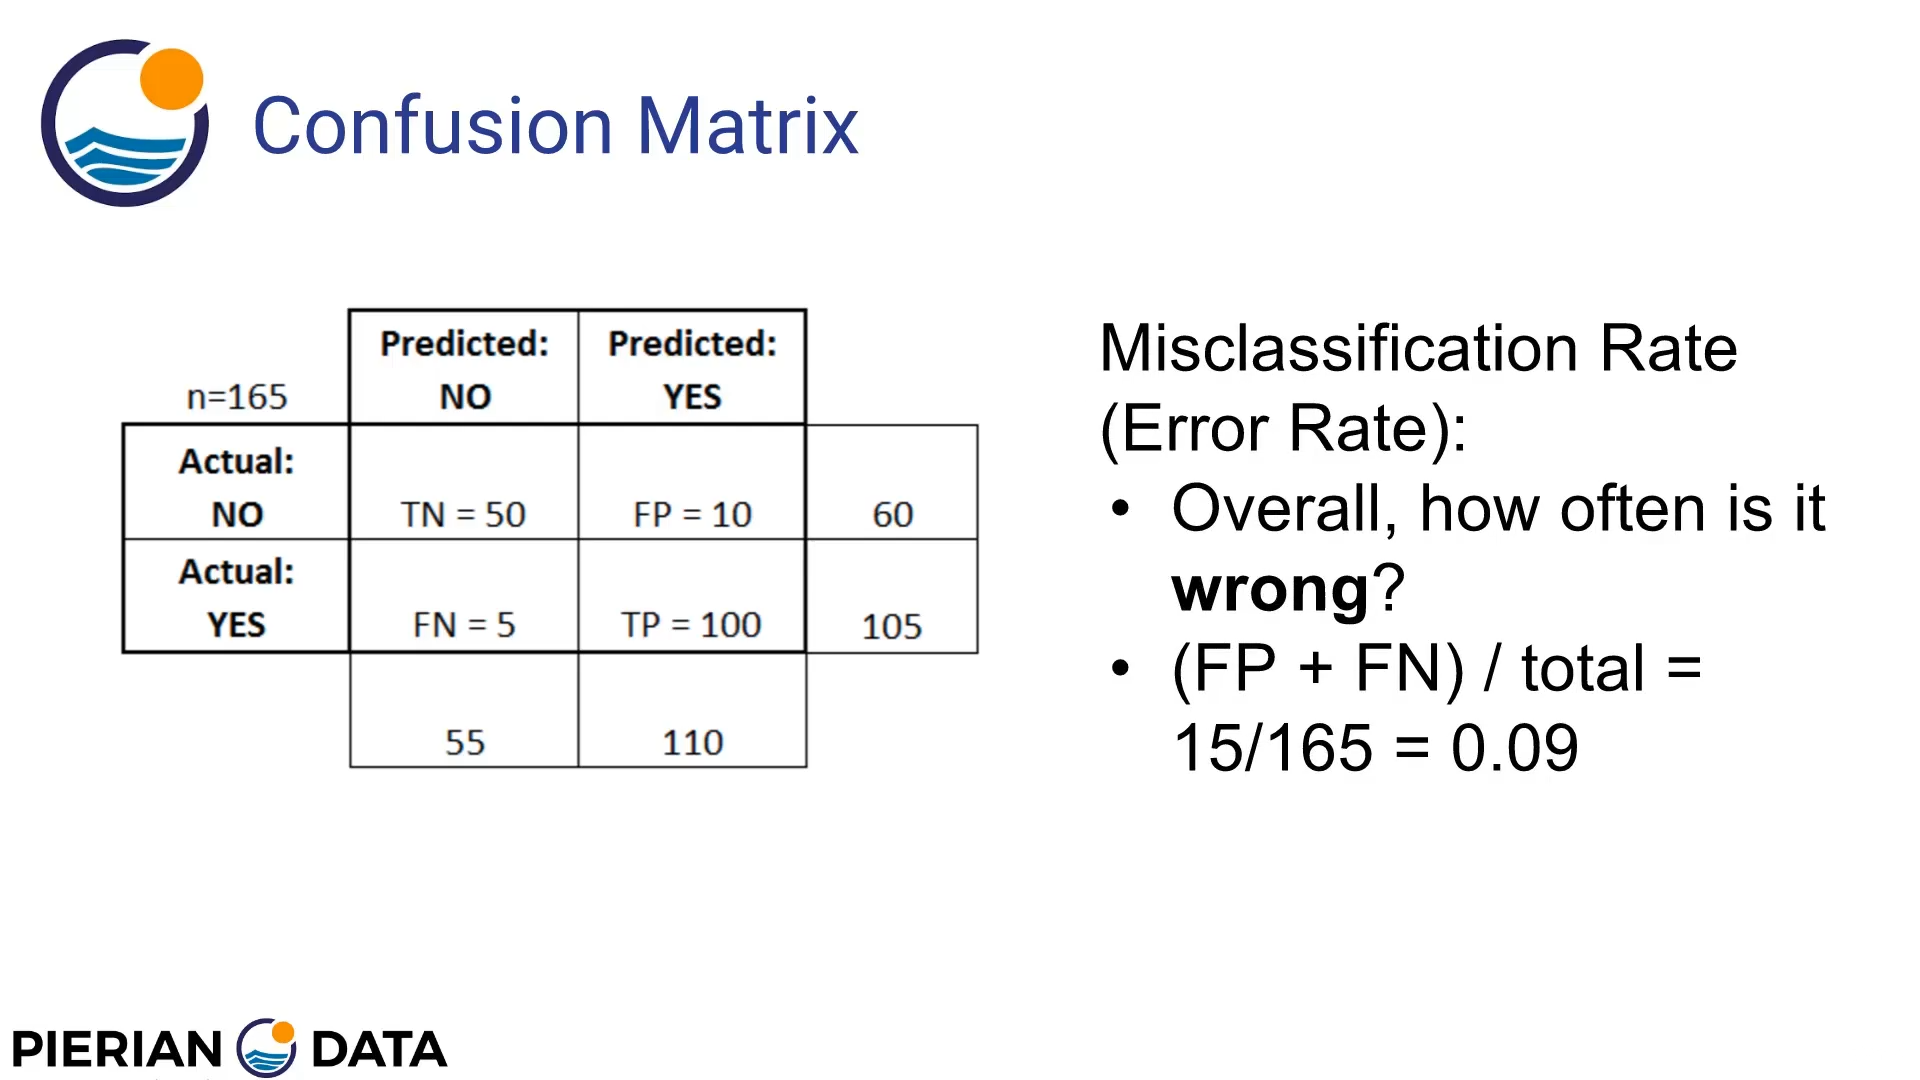

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#yellow lines show the null values present in the dataset, you can see there's a lot of null values in cabin and surely less than in Age meanwhile embarked has just couple of null values

<AxesSubplot:>

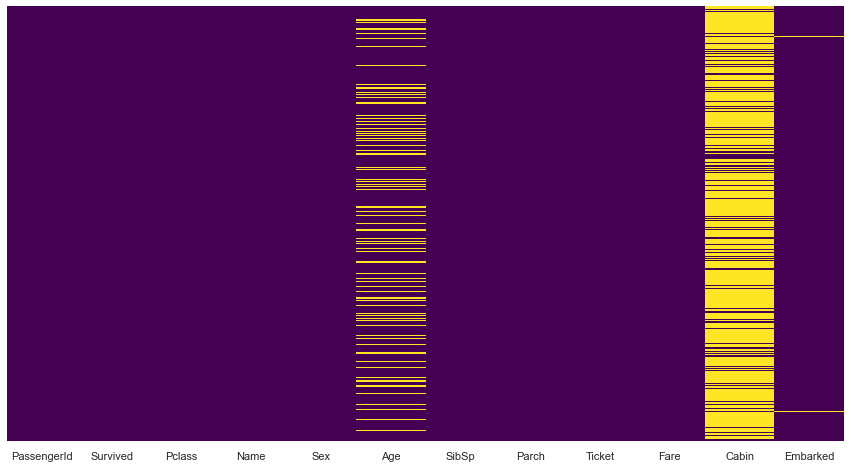

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

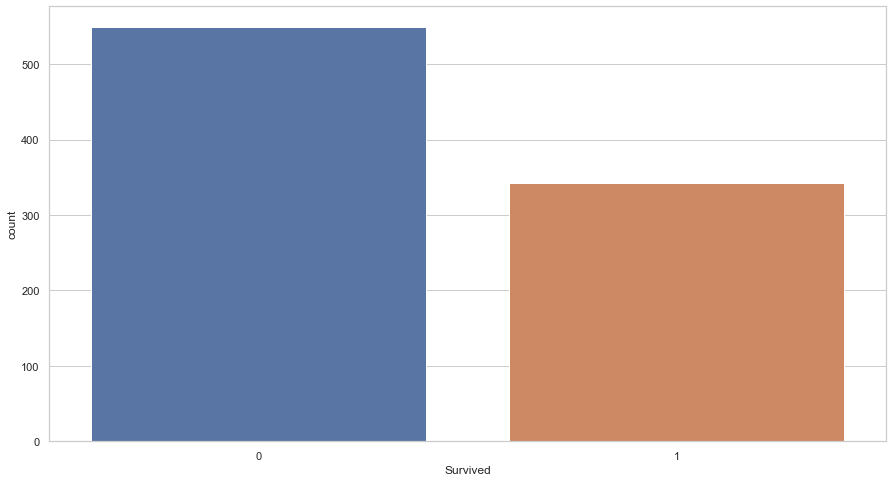

In [15]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

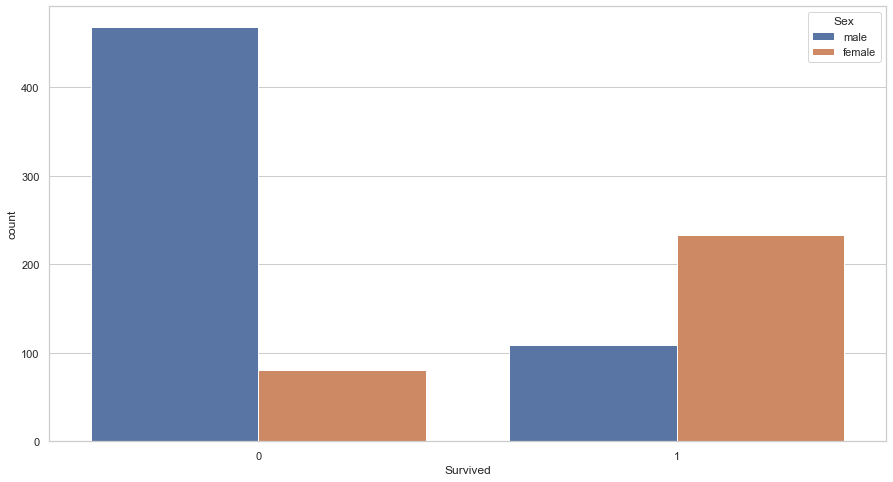

In [16]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

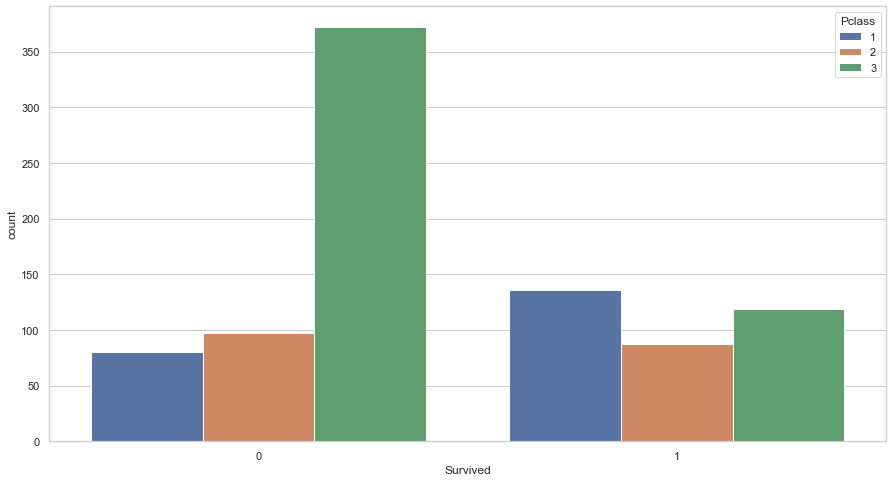

In [17]:
sns.countplot(x='Survived',data=train,hue='Pclass')

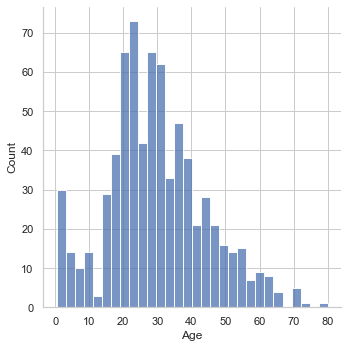

In [20]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

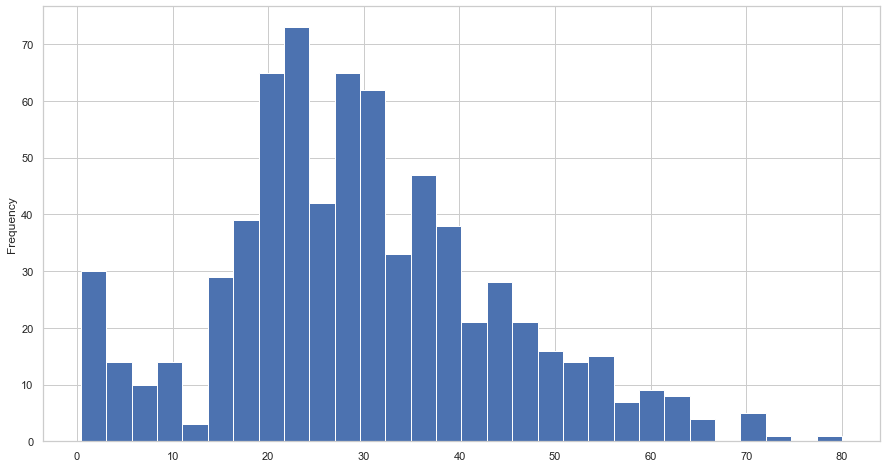

In [22]:
train['Age'].plot.hist(bins=30)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

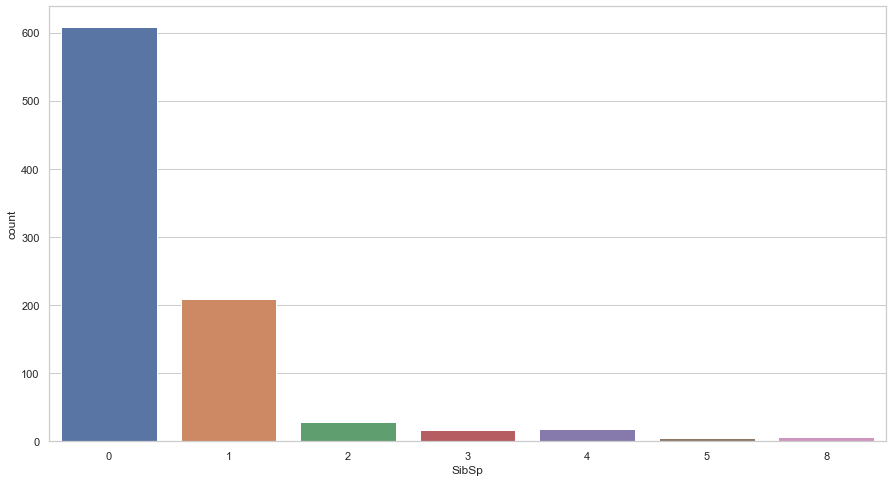

In [24]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:ylabel='Frequency'>

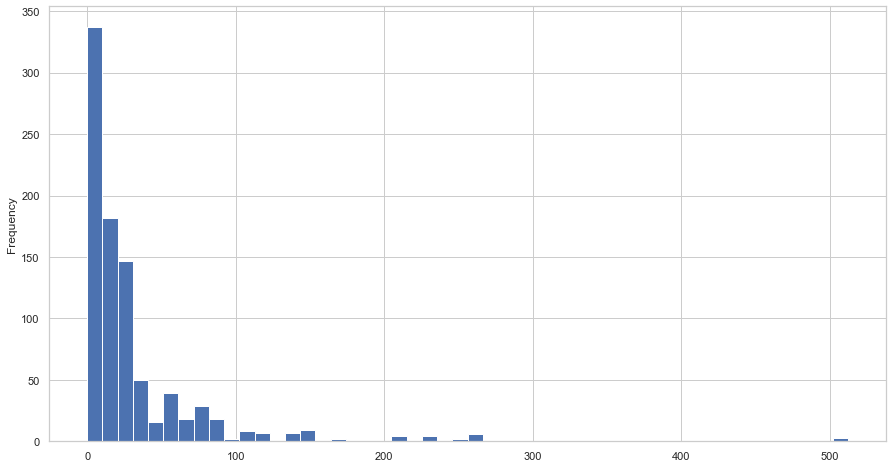

In [26]:
train['Fare'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

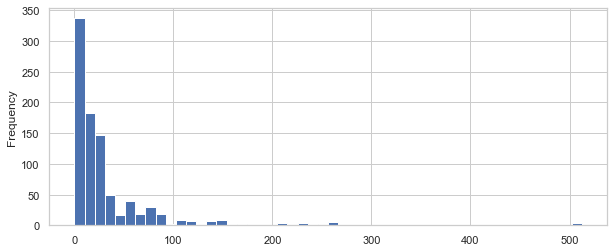

In [27]:
train['Fare'].plot.hist(bins=50,figsize=(10,4))

In [7]:
import cufflinks as cf
cf.go_offline()

In [8]:
train['Fare'].iplot(kind='hist')

In [9]:
train['Fare'].iplot(kind='hist',bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

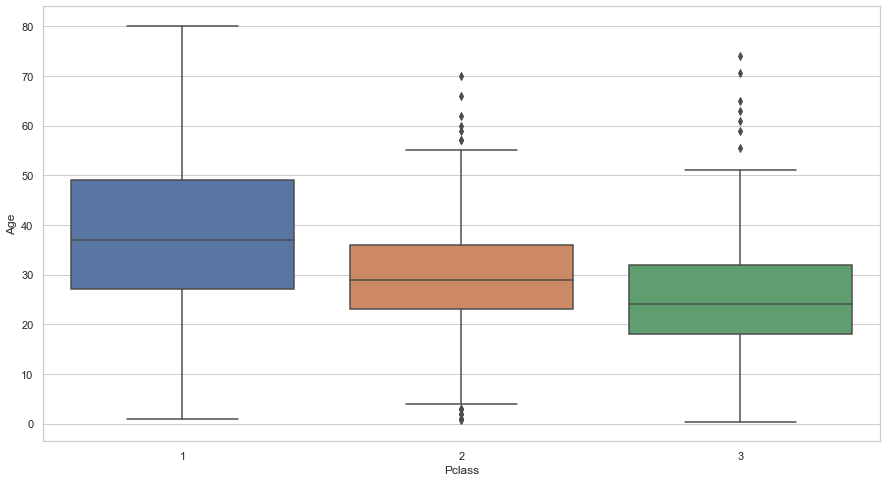

In [32]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
train[['Pclass','Age']].iplot(kind='box')

In [11]:
train['Age'].iplot(kind='box')

In [46]:
#instead of taking the whole age column mean for filling NA. we've taken mean ages from boxplot as per passenger class

In [12]:
def impute_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 28
        else:
            return 20
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_ages,axis=1)

<AxesSubplot:>

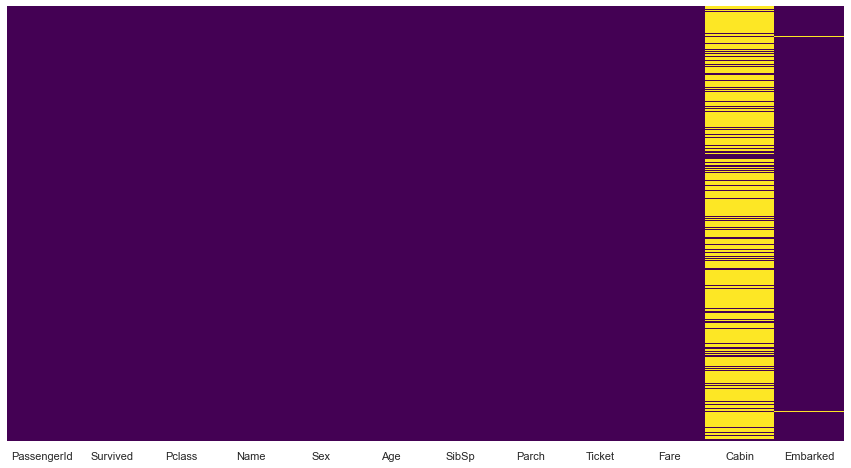

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
#as theres a lot of NA values in cabin so whole column preffered to be dropped

In [16]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

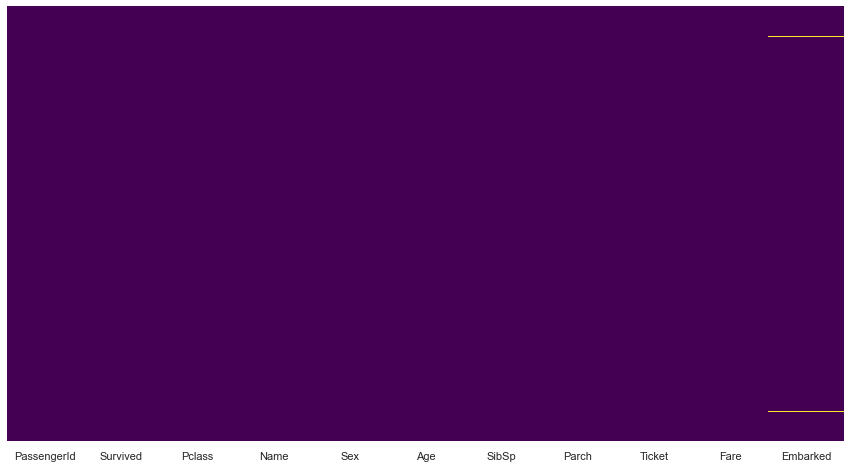

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#as we have only couple of NA's in embarked then they are also preffered to be dropped

In [18]:
train.dropna(inplace=True)

<AxesSubplot:>

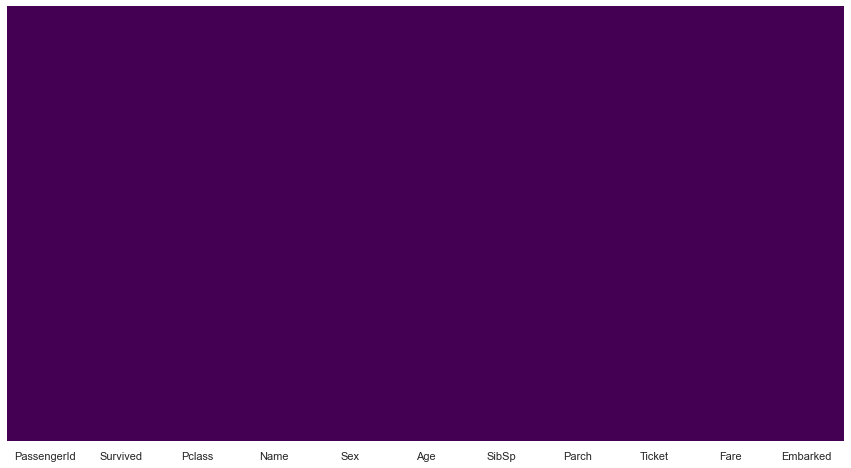

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
#as we have a clean, bold color of heatmap, it means no NA is left in the dataset

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
#consider sex column, it has values in string and ML does'nt understand it unless you apply some NLP and to avoid that you use
#dummy values in binary form

In [21]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [22]:
#we dropped first column so only single binary digit makes the difference between female and male, now 1 is male and 0 is female
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [24]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
#all these C S Q are not good predictors of each other so we went ahead and dropped C column

In [26]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
train  = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
#columns with strings has no use as we already converted sex into binary
#excess columns should be dropped

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#since passenger ID is just +1 of orginal index so we can drop that too

In [32]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
#we are doing the predictions on same train.csv instead of test.csv
#you can do same process separately for test.csv file and then do predictions 

In [35]:
#everything else than 'Survived' will be training features
X = train.drop('Survived',axis=1)

#the column you actually trying to predict, in this case its 'Survived' column
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\Users\Noman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [48]:
#repeat the process separately on train and test csv's then predict some shit.
#this notebook is only done for train.csv

In [ ]:
#end of notebook